First step is to import required libraries and utilities.

In [1]:
# -*- coding: utf-8 -*-
import json # For reading COCO annotations file
import cv2   # For image loading and manipulation
import numpy as np  # For numerical and array operations

from matplotlib import pyplot as plt   # For visualizing images

import os  # For file system access
from ultralytics import YOLO  # Model to train

### STEP I: Visualize Images

First, I set the path to the annotations file. Then I load the file using __json__ library, after which I specifically extract the specific information for the images and their respective annotations.

In [2]:
def return_split_files(split, dataset_folder = "stenosis_dataset", images = True):
    # Path to corresponding COCO annotations file
    if split == "test":
        ANN_PATH = "../extras/extra_coco_annotations.json"
    else:
        ANN_PATH = "../extras/coco_annotations.json"

    # Load annotations file
    file = json.load(open(ANN_PATH, "r"))

    ftype = "images" if images else "labels"
    
    image_base_dir = f"..datasets/{dataset_folder}/{ftype}/{split}"
    image_paths = [os.path.join(image_base_dir, f) for f in os.listdir(image_base_dir)]
    return image_paths

TEST_IMAGE_PATHS = return_split_files("test", "stenosis_dataset", True)
TEST_LABEL_PATHS = return_split_files("test", "stenosis_dataset", False)

### STEP II: Model Training

Now, I train the model. To do this, I need to ensure that the results are repproducible. I also need a configuration file telling the model where to find the data, and what labels to expect in the data.

In [3]:
import torch

In [4]:
# Ensure reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [5]:
# Instantiate model
model = YOLO('yolov9c.pt')

In [6]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): RepNCSPELAN4(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Sequential(
          (0): RepCSP(
            (cv1): Conv(
              (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
              

In [7]:
# Load configuration file
CONFIG_FILE = os.path.join("..", "config", "stenosis_config.yaml")

In [8]:
# Set image size for training
ORIGINAL_IMGSZ = (694, 542)
# IMGSZ = 672
IMGSZ = 640
freeze = None

In [9]:
folder = "stenosis_yolov9c"

In [10]:
# Train model
results = model.train(
    data = CONFIG_FILE,
    visualize = True,
    epochs = 150,
    imgsz = IMGSZ,
    optimizer = "auto",
    lr0 = 1e-4,
    batch = 2,
    pretrained = True,
    freeze = freeze,
    save = True,
    cos_lr = True,
    deterministic = True,
    auto_augment = "augmix",
    patience=0,
    copy_paste = 1.,
    hsv_h = .5,
    mixup = 1.,
    fliplr = 1.,
    name = folder
)

Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=../config/stenosis_config.yaml, epochs=150, time=None, patience=0, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=stenosis_yolov9c, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=True, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

/home/harkhymadhe/miniforge3/envs/mri/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1708025831482/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/train.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
val: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/val.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]


Plotting labels to runs/detect/stenosis_yolov9c/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/stenosis_yolov9c
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.05G      5.833      14.18       3.04         12        640: 100%|██████████| 31/31 [00:05<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.67it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.04G      5.829      13.15      2.973         30        640: 100%|██████████| 31/31 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.53it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.99G      5.917      13.51      3.027         50        640: 100%|██████████| 31/31 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.25it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.11G      5.244      15.49      2.568         17        640: 100%|██████████| 31/31 [00:04<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.85it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.23G      4.164      18.48      1.731          9        640: 100%|██████████| 31/31 [00:04<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.50it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.23G      3.732      17.63      1.537         32        640: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.56it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.23G      3.648      4.672      1.563         33        640: 100%|██████████| 31/31 [00:04<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.51it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.23G      3.959      4.783      1.684         18        640: 100%|██████████| 31/31 [00:04<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.49it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.23G      3.723      3.981      1.591         36        640: 100%|██████████| 31/31 [00:04<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.90it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.23G      3.682      3.642       1.61         12        640: 100%|██████████| 31/31 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.64it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.23G      3.657      3.457      1.579         23        640: 100%|██████████| 31/31 [00:04<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.00it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.23G      3.303      3.323      1.384         32        640: 100%|██████████| 31/31 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.22it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.23G      3.387      3.156      1.414         11        640: 100%|██████████| 31/31 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.99it/s]

                   all         35        239          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.23G      3.247      2.853      1.349         22        640: 100%|██████████| 31/31 [00:04<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.35it/s]

                   all         35        239     0.0171      0.124      0.016    0.00411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.23G      3.078      2.727      1.305         16        640: 100%|██████████| 31/31 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.92it/s]

                   all         35        239     0.0123      0.105     0.0196    0.00491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       2.2G      3.006      2.712      1.247         46        640: 100%|██████████| 31/31 [00:04<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.08it/s]


                   all         35        239    0.00896      0.343     0.0293    0.00752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.26G      3.054      2.833      1.256         30        640: 100%|██████████| 31/31 [00:04<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.14it/s]

                   all         35        239      0.262     0.0399     0.0133    0.00297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.26G      2.979      2.807      1.247         33        640: 100%|██████████| 31/31 [00:04<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.57it/s]

                   all         35        239      0.262     0.0399     0.0133    0.00297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.26G      2.974      2.747      1.237         38        640: 100%|██████████| 31/31 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.23it/s]

                   all         35        239    0.00551      0.232     0.0156    0.00372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.26G      2.956      2.744      1.246         15        640: 100%|██████████| 31/31 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.91it/s]

                   all         35        239      0.293      0.163     0.0303    0.00803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.26G      2.909      2.775      1.214         56        640: 100%|██████████| 31/31 [00:04<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.83it/s]

                   all         35        239     0.0327      0.107      0.036       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.24G      2.976      2.801       1.24         17        640: 100%|██████████| 31/31 [00:04<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.98it/s]

                   all         35        239      0.528       0.12      0.037     0.0115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.24G      2.975      2.772      1.264          5        640: 100%|██████████| 31/31 [00:04<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.95it/s]

                   all         35        239      0.279      0.186     0.0375     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.24G      2.858      2.729      1.206          5        640: 100%|██████████| 31/31 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.42it/s]

                   all         35        239      0.271      0.259      0.027     0.0082



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.24G      2.979      2.646      1.278         10        640: 100%|██████████| 31/31 [00:04<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.61it/s]

                   all         35        239       0.28      0.143     0.0297    0.00923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.24G      2.879      2.602      1.228         17        640: 100%|██████████| 31/31 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.98it/s]

                   all         35        239    0.00821       0.23     0.0256    0.00714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.24G      2.815      2.599      1.228         15        640: 100%|██████████| 31/31 [00:04<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.27it/s]

                   all         35        239      0.014      0.333     0.0289    0.00605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.24G      2.904      2.628      1.294         20        640: 100%|██████████| 31/31 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.54it/s]

                   all         35        239     0.0211      0.411     0.0393    0.00986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.24G      2.911      2.644      1.197          8        640: 100%|██████████| 31/31 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.44it/s]

                   all         35        239     0.0071      0.292     0.0149    0.00445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.24G      2.909      2.585      1.265         12        640: 100%|██████████| 31/31 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]

                   all         35        239    0.00836      0.337     0.0328    0.00909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.24G       2.85      2.501      1.176         14        640: 100%|██████████| 31/31 [00:04<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.82it/s]

                   all         35        239     0.0316      0.402      0.052     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.24G      2.854      2.565      1.196         16        640: 100%|██████████| 31/31 [00:04<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.79it/s]

                   all         35        239     0.0139      0.484     0.0352     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.25G      2.754      2.483      1.158         27        640: 100%|██████████| 31/31 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.12it/s]

                   all         35        239     0.0116      0.518     0.0422     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.24G      2.801      2.531      1.202          7        640: 100%|██████████| 31/31 [00:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.08it/s]

                   all         35        239     0.0117      0.493     0.0393     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.23G       2.69      2.495      1.176         19        640: 100%|██████████| 31/31 [00:05<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.92it/s]

                   all         35        239      0.276      0.312     0.0425     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.23G      2.717       2.46      1.146         12        640: 100%|██████████| 31/31 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.12it/s]

                   all         35        239     0.0218      0.473     0.0472     0.0148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.23G      2.769      2.498      1.163         54        640: 100%|██████████| 31/31 [00:05<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.25it/s]

                   all         35        239     0.0125       0.55     0.0429     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.23G      2.735      2.499      1.235         22        640: 100%|██████████| 31/31 [00:05<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.71it/s]

                   all         35        239     0.0134      0.514     0.0388      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.23G      2.741      2.439      1.121         35        640: 100%|██████████| 31/31 [00:05<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.79it/s]

                   all         35        239     0.0126      0.477     0.0328     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.23G      2.714      2.452      1.201         41        640: 100%|██████████| 31/31 [00:05<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.84it/s]

                   all         35        239     0.0131       0.57     0.0375     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.23G       2.73      2.447      1.174         28        640: 100%|██████████| 31/31 [00:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.48it/s]

                   all         35        239     0.0123      0.571     0.0468     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.23G      2.682      2.399      1.129         29        640: 100%|██████████| 31/31 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.03it/s]

                   all         35        239     0.0121      0.554     0.0486      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.23G      2.752      2.381       1.13         17        640: 100%|██████████| 31/31 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.48it/s]

                   all         35        239     0.0144      0.562     0.0374      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.23G       2.71      2.386      1.169         11        640: 100%|██████████| 31/31 [00:04<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.92it/s]

                   all         35        239     0.0124      0.543     0.0356     0.0116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.23G      2.687      2.326      1.153         31        640: 100%|██████████| 31/31 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.84it/s]

                   all         35        239     0.0107      0.477     0.0364     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.23G      2.618      2.282      1.153         33        640: 100%|██████████| 31/31 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.48it/s]

                   all         35        239      0.266      0.229     0.0264    0.00839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.23G      2.651      2.327      1.142         23        640: 100%|██████████| 31/31 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.05it/s]

                   all         35        239      0.525      0.136      0.026    0.00736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       2.2G      2.616      2.228      1.176         26        640: 100%|██████████| 31/31 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.03it/s]

                   all         35        239    0.00311      0.123     0.0185    0.00292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.23G      2.561      2.176      1.122         24        640: 100%|██████████| 31/31 [00:05<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.83it/s]

                   all         35        239    0.00125     0.0415    0.00167   0.000298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.25G      2.647       2.19      1.159         30        640: 100%|██████████| 31/31 [00:05<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.06it/s]

                   all         35        239    0.00125     0.0415    0.00167   0.000298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.24G      2.663      2.168      1.185          8        640: 100%|██████████| 31/31 [00:05<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.71it/s]

                   all         35        239   0.000174    0.00263   0.000117   1.17e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.25G      2.733      2.173      1.107         27        640: 100%|██████████| 31/31 [00:05<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.74it/s]

                   all         35        239   0.000734    0.00789    0.00061   0.000197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.25G      2.563      2.068      1.097         30        640: 100%|██████████| 31/31 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.08it/s]

                   all         35        239   0.000705    0.00789   0.000428   0.000197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.24G      2.566      2.087      1.119         12        640: 100%|██████████| 31/31 [00:05<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.76it/s]

                   all         35        239   0.000616    0.00526   0.000334   0.000133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.23G      2.627      2.127      1.147         16        640: 100%|██████████| 31/31 [00:05<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.01it/s]

                   all         35        239   0.000935    0.00526   0.000498   0.000198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.23G      2.618      2.028      1.129         32        640: 100%|██████████| 31/31 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.82it/s]

                   all         35        239   0.000935    0.00526   0.000498   0.000198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.23G       2.59      2.081      1.094         12        640: 100%|██████████| 31/31 [00:04<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.31it/s]

                   all         35        239   0.000523    0.00263   0.000287   0.000112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.23G       2.57      2.172      1.097         33        640: 100%|██████████| 31/31 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.03it/s]

                   all         35        239    0.00163    0.00989   0.000847   0.000154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.23G      2.521      2.182      1.103         30        640: 100%|██████████| 31/31 [00:04<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.89it/s]

                   all         35        239    0.00417     0.0738     0.0032    0.00121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.23G      2.475      2.118      1.079         22        640: 100%|██████████| 31/31 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.34it/s]

                   all         35        239    0.00113     0.0102    0.00059    5.9e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.23G      2.517       2.09      1.086          6        640: 100%|██████████| 31/31 [00:04<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.74it/s]

                   all         35        239   0.000899    0.00526   0.000472   9.44e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.23G      2.522      2.059      1.127          7        640: 100%|██████████| 31/31 [00:05<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.99it/s]

                   all         35        239    0.00671     0.0195    0.00396    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.23G       2.46      2.104      1.095         20        640: 100%|██████████| 31/31 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.72it/s]

                   all         35        239     0.0195      0.136     0.0173    0.00705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.23G      2.435      1.962      1.065         28        640: 100%|██████████| 31/31 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.16it/s]

                   all         35        239     0.0202      0.329     0.0239    0.00819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.23G      2.442      2.019      1.077         36        640: 100%|██████████| 31/31 [00:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.27it/s]

                   all         35        239      0.537     0.0977     0.0311     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.23G      2.422      2.025      1.091         31        640: 100%|██████████| 31/31 [00:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.31it/s]

                   all         35        239      0.286      0.138     0.0329     0.0115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.23G      2.389      1.979      1.058         16        640: 100%|██████████| 31/31 [00:05<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.85it/s]

                   all         35        239      0.282      0.125     0.0247    0.00817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.23G      2.496      2.045      1.076         34        640: 100%|██████████| 31/31 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.16it/s]

                   all         35        239      0.532      0.177     0.0249    0.00747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.23G      2.361      1.982      1.039         32        640: 100%|██████████| 31/31 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.76it/s]

                   all         35        239      0.536      0.126     0.0267    0.00796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.23G      2.325      1.959      1.046         21        640: 100%|██████████| 31/31 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.91it/s]

                   all         35        239      0.544      0.144      0.037     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.23G       2.36      1.891      1.063          8        640: 100%|██████████| 31/31 [00:04<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.29it/s]

                   all         35        239      0.549      0.123     0.0352     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.23G      2.354      1.893      1.064         24        640: 100%|██████████| 31/31 [00:04<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.77it/s]

                   all         35        239      0.544      0.106     0.0312    0.00932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.23G      2.252      1.831      1.045         19        640: 100%|██████████| 31/31 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.94it/s]

                   all         35        239      0.548      0.112     0.0319    0.00925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.23G      2.314      1.871      1.045         18        640: 100%|██████████| 31/31 [00:05<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.33it/s]

                   all         35        239      0.554     0.0875     0.0337       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.23G      2.252      1.855      1.053         20        640: 100%|██████████| 31/31 [00:05<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.36it/s]

                   all         35        239      0.558      0.114     0.0376     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.23G      2.276      1.827      1.036         11        640: 100%|██████████| 31/31 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.05it/s]

                   all         35        239      0.551     0.0983     0.0336    0.00994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.23G      2.326      1.868      1.038          7        640: 100%|██████████| 31/31 [00:04<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.85it/s]

                   all         35        239      0.544     0.0913     0.0299    0.00912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.23G      2.356      1.894      1.088         33        640: 100%|██████████| 31/31 [00:05<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.53it/s]

                   all         35        239      0.545      0.093     0.0285    0.00842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.23G      2.312       1.89      1.062         39        640: 100%|██████████| 31/31 [00:05<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.74it/s]

                   all         35        239      0.546      0.106     0.0319     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       2.2G      2.254       1.84      1.018         20        640: 100%|██████████| 31/31 [00:05<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.12it/s]

                   all         35        239      0.538      0.107     0.0341     0.0114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.23G      2.349      1.859       1.05         56        640: 100%|██████████| 31/31 [00:06<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.34it/s]

                   all         35        239       0.54     0.0992     0.0333     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.23G      2.302      1.827      1.061         26        640: 100%|██████████| 31/31 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.48it/s]

                   all         35        239       0.54     0.0992     0.0333     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.23G      2.311      1.846      1.035         19        640: 100%|██████████| 31/31 [00:05<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.50it/s]

                   all         35        239      0.541     0.0943     0.0309     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.23G      2.283      1.844      1.051         29        640: 100%|██████████| 31/31 [00:04<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.49it/s]

                   all         35        239      0.538     0.0617     0.0225    0.00801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.23G      2.242      1.821      1.029         16        640: 100%|██████████| 31/31 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.99it/s]

                   all         35        239      0.532     0.0663     0.0229    0.00755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.23G      2.294      1.846      1.045          8        640: 100%|██████████| 31/31 [00:04<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.49it/s]

                   all         35        239      0.543     0.0686     0.0278    0.00928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.23G      2.332      1.847      1.039         31        640: 100%|██████████| 31/31 [00:04<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.98it/s]

                   all         35        239      0.543     0.0428     0.0291    0.00953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.23G      2.273      1.839      1.024          8        640: 100%|██████████| 31/31 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.06it/s]

                   all         35        239      0.551     0.0455     0.0301    0.00946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.23G      2.322       2.02      1.035          3        640: 100%|██████████| 31/31 [00:05<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.23it/s]

                   all         35        239      0.572     0.0467     0.0211    0.00612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.23G      2.252      1.776      1.036         31        640: 100%|██████████| 31/31 [00:04<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.04it/s]

                   all         35        239      0.557     0.0471     0.0241    0.00706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.23G      2.263      1.793      1.035         17        640: 100%|██████████| 31/31 [00:04<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.12it/s]

                   all         35        239      0.534     0.0428     0.0192    0.00632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.23G      2.247      1.759      1.028         14        640: 100%|██████████| 31/31 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.05it/s]

                   all         35        239       0.54      0.055      0.022    0.00699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.23G      2.259      1.812      1.068         34        640: 100%|██████████| 31/31 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.88it/s]

                   all         35        239      0.536     0.0653     0.0245    0.00771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.23G      2.239      1.842      1.032         23        640: 100%|██████████| 31/31 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.45it/s]

                   all         35        239      0.548     0.0676     0.0248     0.0074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.23G      2.273      1.801      1.048         13        640: 100%|██████████| 31/31 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.42it/s]

                   all         35        239      0.548     0.0445     0.0252    0.00781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.23G      2.261      1.775      1.033         34        640: 100%|██████████| 31/31 [00:04<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.39it/s]

                   all         35        239      0.542     0.0495     0.0266    0.00908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.23G      2.253      1.784      1.051         25        640: 100%|██████████| 31/31 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.44it/s]

                   all         35        239      0.546      0.047      0.025    0.00865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.23G      2.149      1.702      1.012         18        640: 100%|██████████| 31/31 [00:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.17it/s]

                   all         35        239       0.57     0.0445     0.0276    0.00905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.23G      2.199      1.725      1.027         19        640: 100%|██████████| 31/31 [00:05<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.93it/s]

                   all         35        239      0.587     0.0422     0.0253    0.00829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.23G      2.186      1.736      1.022         14        640: 100%|██████████| 31/31 [00:05<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.51it/s]

                   all         35        239       0.58     0.0475     0.0275    0.00869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.23G      2.178       1.72      1.013          6        640: 100%|██████████| 31/31 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.06it/s]

                   all         35        239      0.563     0.0442     0.0282     0.0082



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.23G      2.193      1.715      1.017         21        640: 100%|██████████| 31/31 [00:05<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.98it/s]

                   all         35        239      0.544     0.0497     0.0235    0.00727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.23G       2.18      1.749      1.031         20        640: 100%|██████████| 31/31 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.39it/s]

                   all         35        239      0.538      0.062     0.0212     0.0064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.23G      2.151      1.726     0.9928         18        640: 100%|██████████| 31/31 [00:04<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.61it/s]

                   all         35        239      0.538     0.0544       0.02    0.00617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.23G      2.104      1.964      1.003          0        640: 100%|██████████| 31/31 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.63it/s]

                   all         35        239      0.545     0.0567     0.0275    0.00801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.23G      2.138      1.668     0.9911         29        640: 100%|██████████| 31/31 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.82it/s]

                   all         35        239      0.578     0.0524     0.0283    0.00892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.23G      2.185      1.713      1.027         18        640: 100%|██████████| 31/31 [00:04<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.93it/s]

                   all         35        239      0.537     0.0501     0.0201    0.00619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.23G      2.115      1.661     0.9989          5        640: 100%|██████████| 31/31 [00:04<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.84it/s]

                   all         35        239      0.538     0.0214     0.0173    0.00617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.23G      2.126       1.72      1.009         26        640: 100%|██████████| 31/31 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.73it/s]

                   all         35        239      0.526     0.0152     0.0116    0.00413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.23G      2.085      1.697      1.022         16        640: 100%|██████████| 31/31 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.39it/s]

                   all         35        239       0.52     0.0152     0.0106    0.00377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.23G      2.095      1.607      1.022         15        640: 100%|██████████| 31/31 [00:05<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.75it/s]

                   all         35        239       0.53     0.0175     0.0108    0.00353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150       2.2G      2.007      1.606      1.003         26        640: 100%|██████████| 31/31 [00:05<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.23it/s]

                   all         35        239      0.512       0.03    0.00982    0.00354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.23G      2.109      1.632      1.024         30        640: 100%|██████████| 31/31 [00:05<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.85it/s]

                   all         35        239       0.52     0.0227     0.0107    0.00423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.23G       2.12      1.627      1.011         21        640: 100%|██████████| 31/31 [00:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.55it/s]

                   all         35        239       0.52     0.0227     0.0107    0.00423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.23G      2.117      1.645      1.011         12        640: 100%|██████████| 31/31 [00:04<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.71it/s]

                   all         35        239      0.516     0.0405    0.00972    0.00403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.23G       2.17      1.698      1.027         21        640: 100%|██████████| 31/31 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.66it/s]

                   all         35        239      0.517     0.0405    0.00933    0.00376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.23G      2.212      1.695      1.032         25        640: 100%|██████████| 31/31 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.32it/s]

                   all         35        239      0.517     0.0405     0.0088    0.00341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.23G      2.136       1.61      1.008         27        640: 100%|██████████| 31/31 [00:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.95it/s]

                   all         35        239      0.515     0.0353     0.0083     0.0033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.23G      2.175      1.729      1.013         30        640: 100%|██████████| 31/31 [00:05<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.92it/s]

                   all         35        239      0.515     0.0277      0.008     0.0029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.23G      2.043      1.657      1.001          5        640: 100%|██████████| 31/31 [00:04<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.07it/s]

                   all         35        239      0.516      0.025    0.00812    0.00303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.23G      2.144      1.694      1.016         15        640: 100%|██████████| 31/31 [00:05<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.35it/s]

                   all         35        239      0.513     0.0224    0.00777    0.00292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.23G      2.125      1.651      1.033         25        640: 100%|██████████| 31/31 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.30it/s]

                   all         35        239      0.523     0.0224    0.00949    0.00323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.23G      2.174      1.699      1.044         13        640: 100%|██████████| 31/31 [00:04<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.97it/s]

                   all         35        239      0.516     0.0224     0.0102    0.00351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.23G      2.132      1.649      1.015         37        640: 100%|██████████| 31/31 [00:05<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.79it/s]

                   all         35        239      0.517     0.0274     0.0102    0.00396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.23G      2.155      1.691      1.028         18        640: 100%|██████████| 31/31 [00:05<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.41it/s]

                   all         35        239      0.523     0.0274     0.0125    0.00459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.23G      2.122      1.654      1.001         12        640: 100%|██████████| 31/31 [00:05<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 14.06it/s]

                   all         35        239      0.523     0.0402     0.0128    0.00437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.23G      2.058      1.593     0.9941         10        640: 100%|██████████| 31/31 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.08it/s]

                   all         35        239      0.525     0.0455     0.0145    0.00466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.23G      2.049       1.58     0.9917         28        640: 100%|██████████| 31/31 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.82it/s]

                   all         35        239       0.52     0.0455     0.0149    0.00484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.23G      2.054      1.653     0.9957         15        640: 100%|██████████| 31/31 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.96it/s]

                   all         35        239      0.521     0.0507     0.0157    0.00481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.23G      2.068      1.576     0.9903         15        640: 100%|██████████| 31/31 [00:05<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.22it/s]

                   all         35        239      0.523     0.0522     0.0165    0.00499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.23G      2.102      1.613      1.001         14        640: 100%|██████████| 31/31 [00:05<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.44it/s]

                   all         35        239       0.52      0.056     0.0166    0.00492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.23G      2.122      1.581     0.9826         29        640: 100%|██████████| 31/31 [00:05<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.42it/s]

                   all         35        239      0.525     0.0609     0.0177    0.00542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.23G      2.063      1.628     0.9854          7        640: 100%|██████████| 31/31 [00:06<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.64it/s]

                   all         35        239      0.524     0.0583     0.0177    0.00546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.23G      1.977       1.57     0.9614         26        640: 100%|██████████| 31/31 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.67it/s]

                   all         35        239      0.527     0.0583     0.0179    0.00547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.23G      2.108      1.593     0.9935         17        640: 100%|██████████| 31/31 [00:06<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.53it/s]

                   all         35        239      0.526      0.053     0.0187    0.00603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.23G      2.125      1.651     0.9865         33        640: 100%|██████████| 31/31 [00:05<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.83it/s]

                   all         35        239      0.525     0.0507     0.0189    0.00574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.23G      2.013      1.566     0.9873         18        640: 100%|██████████| 31/31 [00:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.95it/s]

                   all         35        239      0.541     0.0504     0.0185    0.00578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.23G      2.064      1.597     0.9962         20        640: 100%|██████████| 31/31 [00:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.83it/s]

                   all         35        239      0.528      0.053     0.0182    0.00524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.23G      2.041      1.585     0.9953         30        640: 100%|██████████| 31/31 [00:06<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.33it/s]

                   all         35        239      0.271      0.056     0.0178    0.00514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.23G       2.03      1.604     0.9861         39        640: 100%|██████████| 31/31 [00:05<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 13.89it/s]

                   all         35        239      0.273     0.0609     0.0165    0.00478


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.23G       1.95      1.734     0.9953          7        640: 100%|██████████| 31/31 [00:05<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.59it/s]

                   all         35        239      0.527     0.0524     0.0124    0.00353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.23G      2.027      1.826     0.9909          6        640: 100%|██████████| 31/31 [00:05<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.63it/s]

                   all         35        239       0.52     0.0563     0.0114    0.00328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.23G      1.925      1.721      1.017          6        640: 100%|██████████| 31/31 [00:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.03it/s]

                   all         35        239      0.517      0.056     0.0105    0.00318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150       2.2G      1.937      1.674     0.9872          7        640: 100%|██████████| 31/31 [00:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.36it/s]

                   all         35        239       0.52      0.058    0.00988    0.00312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.26G      1.979      1.724     0.9923          6        640: 100%|██████████| 31/31 [00:06<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.61it/s]

                   all         35        239      0.518     0.0577    0.00903    0.00311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.26G      1.954      1.606      1.027          6        640: 100%|██████████| 31/31 [00:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.13it/s]

                   all         35        239      0.518     0.0577    0.00903    0.00311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.26G      1.957      1.632     0.9899          5        640: 100%|██████████| 31/31 [00:05<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.38it/s]

                   all         35        239      0.518     0.0603     0.0108    0.00364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.26G       1.94       1.64     0.9858          6        640: 100%|██████████| 31/31 [00:05<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.16it/s]

                   all         35        239      0.266     0.0626    0.00927    0.00305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.26G      1.884      1.645     0.9679          8        640: 100%|██████████| 31/31 [00:04<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 12.17it/s]

                   all         35        239      0.268     0.0653     0.0109    0.00368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.24G      2.008      1.681     0.9746          7        640: 100%|██████████| 31/31 [00:05<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.97it/s]

                   all         35        239      0.269       0.06    0.00885    0.00301



150 epochs completed in 0.311 hours.
Optimizer stripped from runs/detect/stenosis_yolov9c/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/stenosis_yolov9c/weights/best.pt, 51.6MB

Validating runs/detect/stenosis_yolov9c/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
YOLOv9c summary (fused): 384 layers, 25322332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.38it/s]


                   all         35        239     0.0123      0.571      0.047     0.0172
      Grade 0 Stenosis         35         12          0          0          0          0
      Grade 1 Stenosis         35         24    0.00717       0.75     0.0388    0.00976
      Grade 2 Stenosis         35         95     0.0151      0.737     0.0321     0.0115
      Grade 3 Stenosis         35        108     0.0268      0.796      0.117     0.0477
Speed: 0.7ms preprocess, 16.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/stenosis_yolov9c


In [11]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb370c0a130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [12]:
def return_split_files(split, dataset_folder = "dataset", images = True):
    # Path to corresponding COCO annotations file
    if split == "test":
        ANN_PATH = "../extras/extra_coco_annotations.json"
    else:
        ANN_PATH = "../extras/coco_annotations.json"

    # Load annotations file
    file = json.load(open(ANN_PATH, "r"))

    ftype = "images" if images else "labels"
    
    image_base_dir = f"../datasets/{dataset_folder}/{ftype}/{split}"
    image_paths = [os.path.join(image_base_dir, f) for f in os.listdir(image_base_dir)]
    return image_paths

In [13]:
TRAIN_IMAGE_PATHS = return_split_files("train", "stenosis_dataset", True)
TRAIN_LABEL_PATHS = return_split_files("train", "stenosis_dataset", False)

In [14]:
VAL_IMAGE_PATHS = return_split_files("val", "stenosis_dataset", True)
VAL_LABEL_PATHS = return_split_files("val", "stenosis_dataset", False)

In [15]:
TEST_IMAGE_PATHS = return_split_files("test", "stenosis_dataset", True)
TEST_LABEL_PATHS = return_split_files("test", "stenosis_dataset", False)

---

Now we test and validate the model performance.

In [16]:
del model

In [17]:
import gc
gc.collect()

284

In [18]:
model = YOLO("runs/detect/stenosis_yolov9c/weights/best.pt")

In [19]:
# Evaluate model performance on train set
model.val(split = "train", name = folder)

Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
YOLOv9c summary (fused): 384 layers, 25322332 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/train.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]


                   all         61        412     0.0112       0.53     0.0435     0.0128
      Grade 0 Stenosis         61         26          0          0          0          0
      Grade 1 Stenosis         61         31    0.00379      0.548    0.00602    0.00151
      Grade 2 Stenosis         61        207     0.0203      0.783     0.0744     0.0224
      Grade 3 Stenosis         61        148     0.0208      0.791     0.0938     0.0274
Speed: 0.8ms preprocess, 22.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/stenosis_yolov9c2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb4011bd7c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [20]:
# Evaluate model performance on val set
model.val(split = "val", name = folder)

Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)


val: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/val.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]


                   all         35        239     0.0123       0.57     0.0483     0.0169
      Grade 0 Stenosis         35         12          0          0          0          0
      Grade 1 Stenosis         35         24    0.00716       0.75     0.0397    0.00961
      Grade 2 Stenosis         35         95     0.0148      0.726     0.0331     0.0119
      Grade 3 Stenosis         35        108     0.0272      0.806       0.12     0.0463
Speed: 0.6ms preprocess, 28.5ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/stenosis_yolov9c3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb38941e610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

### Observation

As can be  observed, running the validation code on the val- data split results in an error. This is because the model perfoms completely badly on the val split.

In [21]:
# Evaluate model performance on test set
model.val(split = "test", name = folder)

Ultralytics YOLOv8.2.0 🚀 Python-3.9.18 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)


val: Scanning /mnt/c/Users/Harkhymadhe/Desktop/source/export_3/SpineMRI/datasets/stenosis_dataset/labels/test.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


                   all         38        234    0.00907      0.386     0.0231    0.00735
      Grade 0 Stenosis         38         20          0          0          0          0
      Grade 1 Stenosis         38          4   0.000384       0.25   0.000909   9.09e-05
      Grade 2 Stenosis         38         98     0.0135      0.643     0.0267    0.00784
      Grade 3 Stenosis         38        112     0.0224      0.652     0.0647     0.0215
Speed: 0.3ms preprocess, 27.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/stenosis_yolov9c4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb3892bfa00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

---

Now we test the model to visualize predictions.

In [22]:
conf = .25

In [23]:
PREDS = model.predict(
    TRAIN_IMAGE_PATHS,
    imgsz = 640,
    conf = conf,
    iou = .8,
    show_boxes = False,
    augment = True
)

0: 512x640 (no detections), 30.1ms
1: 512x640 (no detections), 30.1ms
2: 512x640 (no detections), 30.1ms
3: 512x640 (no detections), 30.1ms
4: 512x640 (no detections), 30.1ms
5: 512x640 (no detections), 30.1ms
6: 512x640 (no detections), 30.1ms
7: 512x640 (no detections), 30.1ms
8: 512x640 (no detections), 30.1ms
9: 512x640 (no detections), 30.1ms
10: 512x640 (no detections), 30.1ms
11: 512x640 (no detections), 30.1ms
12: 512x640 (no detections), 30.1ms
13: 512x640 (no detections), 30.1ms
14: 512x640 (no detections), 30.1ms
15: 512x640 (no detections), 30.1ms
16: 512x640 (no detections), 30.1ms
17: 512x640 (no detections), 30.1ms
18: 512x640 (no detections), 30.1ms
19: 512x640 (no detections), 30.1ms
20: 512x640 (no detections), 30.1ms
21: 512x640 (no detections), 30.1ms
22: 512x640 (no detections), 30.1ms
23: 512x640 (no detections), 30.1ms
24: 512x640 (no detections), 30.1ms
25: 512x640 (no detections), 30.1ms
26: 512x640 (no detections), 30.1ms
27: 512x640 (no detections), 30.1ms
28

In [24]:
pred_masks = [mask.boxes.cpu().data.numpy() for mask in PREDS]

In [25]:
pred_masks[0]

array([], shape=(0, 6), dtype=float32)

In [26]:
PREDS[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (542, 694)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))

In [27]:
b = PREDS[0]

In [28]:
b.boxes.xyxy.shape[0]

0

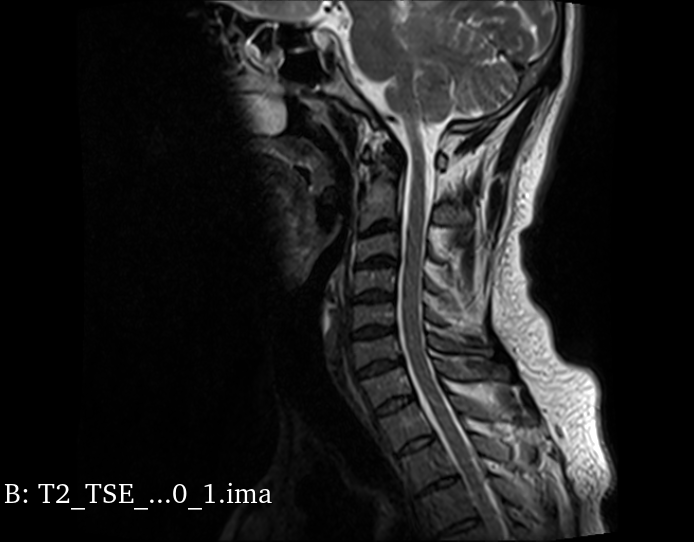

In [29]:
im = b.show()